In [102]:
# Import all important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
from datetime import date, time, datetime, timedelta 
import warnings
warnings.filterwarnings("ignore")
from matplotlib.pyplot import MultipleLocator
import matplotlib.ticker as ticker

In [103]:
Bosten_set=pd.read_csv("boston_2015.csv")

In [104]:
Bosten_set.sort_values(["start_time","bike_id"], inplace=True)
Bosten_set.head(10)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2015-01-01 00:21:44,2015-01-01 00:30:47,115,96,Porter Square Station,Cambridge Main Library at Broadway / Trowbridg...,277,Subscriber
1,2015-01-01 00:27:03,2015-01-01 00:34:21,80,95,MIT Stata Center at Vassar St / Main St,Cambridge St - at Columbia St / Webster Ave,648,Subscriber
2,2015-01-01 00:31:31,2015-01-01 00:35:46,91,68,One Kendall Square at Hampshire St / Portland St,Central Square at Mass Ave / Essex St,555,Subscriber
3,2015-01-01 00:53:46,2015-01-01 01:00:58,115,96,Porter Square Station,Cambridge Main Library at Broadway / Trowbridg...,1307,Subscriber
4,2015-01-01 01:07:06,2015-01-01 01:19:21,105,88,Lower Cambridgeport at Magazine St/Riverside Rd,Inman Square at Vellucci Plaza / Hampshire St,177,Customer
5,2015-01-01 01:28:27,2015-01-01 01:33:38,88,76,Inman Square at Vellucci Plaza / Hampshire St,Central Sq Post Office / Cambridge City Hall a...,685,Subscriber
6,2015-01-01 01:34:54,2015-01-01 01:55:54,91,118,One Kendall Square at Hampshire St / Portland St,Linear Park - Mass. Ave. at Cameron Ave.,940,Subscriber
7,2015-01-01 02:32:35,2015-01-01 02:38:13,68,95,Central Square at Mass Ave / Essex St,Cambridge St - at Columbia St / Webster Ave,656,Subscriber
8,2015-01-01 04:41:58,2015-01-01 04:49:08,117,76,Binney St / Sixth St,Central Sq Post Office / Cambridge City Hall a...,134,Customer
9,2015-01-01 08:00:15,2015-01-01 08:05:04,67,75,MIT at Mass Ave / Amherst St,Lafayette Square at Mass Ave / Main St / Colum...,23,Subscriber


In [105]:
Bosten_set.isnull()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1122553,False,False,False,False,False,False,False,False
1122554,False,False,False,False,False,False,False,False
1122555,False,False,False,False,False,False,False,False
1122556,False,False,False,False,False,False,False,False


In [106]:
Bosten_set.dropna(axis=0, inplace=False)
Bosten_set.dropna(axis=1)
len(Bosten_set)-len(Bosten_set.dropna()) # There is none null value. 

0

In [107]:
Bosten_set["start_time"] = pd.to_datetime(Bosten_set["start_time"])
Bosten_set["end_time"] = pd.to_datetime(Bosten_set["end_time"])

In [108]:
Bosten_set["Duration"]=Bosten_set.end_time-Bosten_set.start_time

In [109]:
Bosten_set.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,Duration
0,2015-01-01 00:21:44,2015-01-01 00:30:47,115,96,Porter Square Station,Cambridge Main Library at Broadway / Trowbridg...,277,Subscriber,0 days 00:09:03
1,2015-01-01 00:27:03,2015-01-01 00:34:21,80,95,MIT Stata Center at Vassar St / Main St,Cambridge St - at Columbia St / Webster Ave,648,Subscriber,0 days 00:07:18
2,2015-01-01 00:31:31,2015-01-01 00:35:46,91,68,One Kendall Square at Hampshire St / Portland St,Central Square at Mass Ave / Essex St,555,Subscriber,0 days 00:04:15
3,2015-01-01 00:53:46,2015-01-01 01:00:58,115,96,Porter Square Station,Cambridge Main Library at Broadway / Trowbridg...,1307,Subscriber,0 days 00:07:12
4,2015-01-01 01:07:06,2015-01-01 01:19:21,105,88,Lower Cambridgeport at Magazine St/Riverside Rd,Inman Square at Vellucci Plaza / Hampshire St,177,Customer,0 days 00:12:15


In [110]:
def get_date (ts):
    return ts.date()

def get_weekday (ts):
    return ts.weekday()

def get_hour (ts):
    return ts.hour

In [111]:
Bosten_set.reset_index(inplace=True)
Bosten_set["Date"] = Bosten_set["start_time"].apply(lambda ts: get_date (ts))
Bosten_set["Weekday"]=Bosten_set["start_time"].apply(lambda x: get_weekday (x))
Bosten_set["Hour"]=Bosten_set["start_time"].apply(lambda x: get_hour (x))

In [112]:
Bosten_set.head()

,index,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,Duration,Date,Weekday,Hour
0,0,2015-01-01 00:21:44,2015-01-01 00:30:47,115,96,Porter Square Station,Cambridge Main Library at Broadway / Trowbridg...,277,Subscriber,0 days 00:09:03,2015-01-01,3,0
1,1,2015-01-01 00:27:03,2015-01-01 00:34:21,80,95,MIT Stata Center at Vassar St / Main St,Cambridge St - at Columbia St / Webster Ave,648,Subscriber,0 days 00:07:18,2015-01-01,3,0
2,2,2015-01-01 00:31:31,2015-01-01 00:35:46,91,68,One Kendall Square at Hampshire St / Portland St,Central Square at Mass Ave / Essex St,555,Subscriber,0 days 00:04:15,2015-01-01,3,0
3,3,2015-01-01 00:53:46,2015-01-01 01:00:58,115,96,Porter Square Station,Cambridge Main Library at Broadway / Trowbridg...,1307,Subscriber,0 days 00:07:12,2015-01-01,3,0
4,4,2015-01-01 01:07:06,2015-01-01 01:19:21,105,88,Lower Cambridgeport at Magazine St/Riverside Rd,Inman Square at Vellucci Plaza / Hampshire St,177,Customer,0 days 00:12:15,2015-01-01,3,1


In [113]:
# clean the data that deuration larger than 1 day which is abnormal.
Bosten_set_cl=Bosten_set[Bosten_set['Duration'] >= pd.Timedelta(0)]
Bosten_set_clean=Bosten_set_cl[Bosten_set_cl['Duration'] <= pd.Timedelta("1 day")]
Bosten_set_clean.describe()

,index,start_station_id,bike_id,Duration,Weekday,Hour
count,1.121916e+06,1.121916e+06,1.121916e+06,1121916,1.121916e+06,1.121916e+06
mean,5.611340e+05,6.675050e+01,7.301243e+02,0 days 00:15:52.476087336,2.818579e+00,1.378502e+01
std,3.240208e+05,3.848793e+01,4.081443e+02,0 days 00:34:48.295702884,1.904177e+00,4.797964e+00
min,0.000000e+00,1.000000e+00,1.000000e+00,0 days 00:01:01,0.000000e+00,0.000000e+00
25%,2.805298e+05,3.600000e+01,3.820000e+02,0 days 00:06:44,1.000000e+00,1.000000e+01
50%,5.610545e+05,6.600000e+01,7.440000e+02,0 days 00:11:01,3.000000e+00,1.500000e+01
75%,8.417082e+05,9.500000e+01,1.077000e+03,0 days 00:17:53,4.000000e+00,1.700000e+01
max,1.122557e+06,1.800000e+02,1.581000e+03,0 days 23:58:54,6.000000e+00,2.300000e+01


In [114]:
# The overview of the data.
bike_size = len(Bosten_set_clean["bike_id"].unique())

print("It consists of {} bikes (for the observed time frame)".format(bike_size))

number_of_Customer=len(Bosten_set_clean.loc[Bosten_set_clean["user_type"]=="Customer"])
number_of_Subscribe=len(Bosten_set_clean.loc[Bosten_set_clean["user_type"]=="Subscriber"])
print ("The number of demand from customer is {} ".format(number_of_Customer))
print ("The number of demand from subscribe is {} ".format(number_of_Subscribe))

It consists of 1488 bikes (for the observed time frame)
The number of demand from customer is 370463 
The number of demand from subscribe is 751453 


In [115]:
user = Bosten_set.groupby(["Date","user_type"])["index"].count()
user.unstack()

user_type,Customer,Subscriber
Date,,
2015-01-01,35,92
2015-01-02,57,156
2015-01-03,46,96
2015-01-04,33,79
2015-01-05,108,229
...,...,...
2015-12-27,104,403
2015-12-28,386,605
2015-12-29,62,130


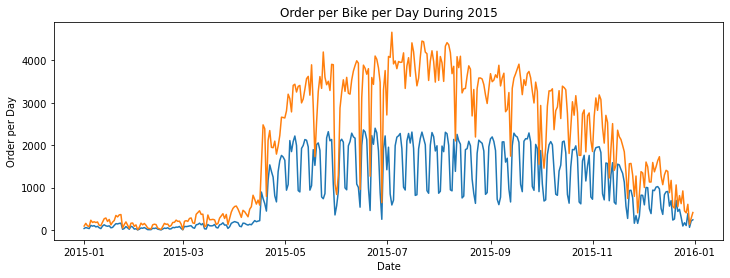

In [116]:
fig,ax = plt.subplots(figsize=(12,4))

ax.plot(user.unstack())
ax.set_xlabel("Date")
ax.set_ylabel("Order per Day")
ax.set_title("Order per Bike per Day During 2015")

plt.show()

# KPI---1. The hourly revenue (measured by the duration)

In [117]:
Bosten_revenue = Bosten_set_clean.iloc[:,[1,2,9]]
Bosten_revenue.head()

,start_time,end_time,Duration
0,2015-01-01 00:21:44,2015-01-01 00:30:47,0 days 00:09:03
1,2015-01-01 00:27:03,2015-01-01 00:34:21,0 days 00:07:18
2,2015-01-01 00:31:31,2015-01-01 00:35:46,0 days 00:04:15
3,2015-01-01 00:53:46,2015-01-01 01:00:58,0 days 00:07:12
4,2015-01-01 01:07:06,2015-01-01 01:19:21,0 days 00:12:15


In [118]:
Bosten_revenue['end_time'][3].hour

1

In [119]:
revenue_list = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

for i in range(Bosten_revenue.shape[0]):
    start_hour = Bosten_revenue.iloc[i,0].hour
    end_hour = Bosten_revenue.iloc[i,1].hour
    if start_hour == end_hour:#in the same hour
        revenue_list[start_hour] += Bosten_revenue.iloc[i,2].seconds 
    else: #not in the same hour
        st = Bosten_revenue.iloc[i,0]
        revenue_list[start_hour] += 60*60 - (st - st.replace(minute = 0,second = 0)).seconds

        et = Bosten_revenue.iloc[i,1]
        revenue_list[end_hour] += (et - et.replace(minute = 0,second = 0)).seconds

        if end_hour > start_hour:
            for j in range(start_hour + 1,end_hour):
                revenue_list[j] += 60*60
        else:
            for j in range(start_hour + 1,24):
                revenue_list[j] += 60*60
            for k in range(0,end_hour):
                revenue_list[k] += 60*60
revenue_list


[11715969,
 8767191,
 6786834,
 4711699,
 4363982,
 6701682,
 17590160,
 43404519,
 75222650,
 50711347,
 42916277,
 51113376,
 61587808,
 65024817,
 67093972,
 73609825,
 89313162,
 117206137,
 91108232,
 64111458,
 43226261,
 30713000,
 24275538,
 17322266]

In [120]:
# total seconds that bikes are used in each hour.
revenue_df = pd.DataFrame(revenue_list,columns = ['total_seconds'])
revenue_df

,total_seconds
0,11715969
1,8767191
2,6786834
3,4711699
4,4363982
5,6701682
6,17590160
7,43404519
8,75222650
9,50711347


In [121]:
print("The max revenue is at 17 o'clock {} " .format(revenue_df.max()) )
print("The min revenue is at 4 o'clock {} " .format(revenue_df.min()) )

The max revenue is at 17 o'clock total_seconds    117206137
dtype: int64 
The min revenue is at 4 o'clock total_seconds    4363982
dtype: int64 


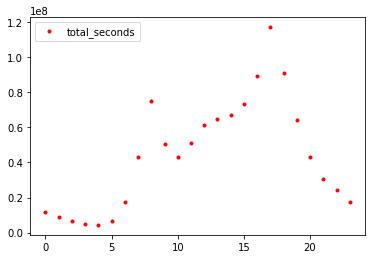

In [122]:
revenue_df.plot(style='r.')
plt.show()

Text(0.5, 1.0, 'The hourly revenue (measured by the duration) in 2015')

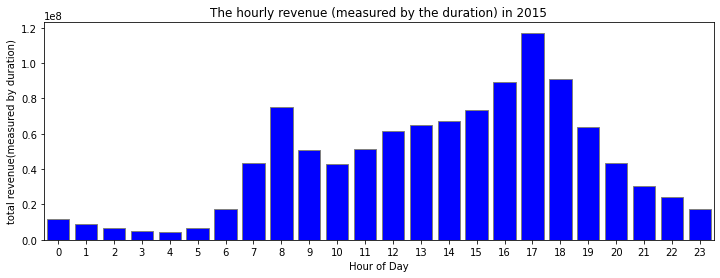

In [123]:
tick_spacing = 1
fig,ax = plt.subplots(figsize=(12,4))
x=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
y=revenue_list
plt.bar(x,y,align="center",color="blue",hatch=" ",ec='gray')
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xlim(-0.5,23.5)
ax.set_xlabel("Hour of Day")
ax.set_ylabel("total revenue(measured by duration)")
ax.set_title("The hourly revenue (measured by the duration) in 2015")
#plt.savefig("The hourly seconds.jpg")

## 2. Fleet rotation: Average hourly uses per bicycle

In [124]:
# We might want to group rows according to "Species" and assign to a new variable "Species_group"
# This now allows us to perform a whole range of aggregation methods on the groups, e.g. take mean of all features:
order_per_bike = Bosten_set_clean.groupby(["Hour","bike_id"])["index"].count()
order_per_bike2= order_per_bike.groupby("Hour").mean()

In [125]:
order_per_bike

Hour  bike_id
0     1           5
      2           5
      3           9
      4          10
      5           4
                 ..
23    1572        2
      1573        2
      1576        1
      1578        3
      1579        1
Name: index, Length: 33668, dtype: int64

In [126]:
order_per_bike2

Hour
0      6.289418
1      3.997823
2      2.707584
3      1.498003
4      1.537112
5      4.295815
6     16.422478
7     43.400134
8     68.124412
9     40.951613
10    30.774411
11    34.345430
12    40.879032
13    41.314516
14    40.797715
15    45.414651
16    63.946909
17    87.379287
18    63.081372
19    43.675639
20    29.392568
21    21.150574
22    15.926351
23    10.421198
Name: index, dtype: float64

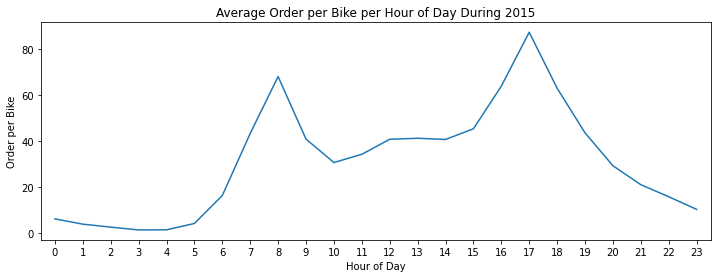

In [127]:
tick_spacing = 1
fig,ax = plt.subplots(figsize=(12,4))

ax.plot(order_per_bike2)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Order per Bike")
ax.set_title("Average Order per Bike per Hour of Day During 2015")
plt.xlim(-0.5,23.5)
plt.show()
#plt.savefig("Average Order per Bike per Hour of Day During 2015.jpg")

# 3. The hourly demand in 2015

In [128]:
demand = Bosten_set_clean.groupby(["Date","Hour"])["index"].count()
demand2= demand.groupby("Hour").mean()

In [129]:
demand.head()

Date        Hour
2015-01-01  0       4
            1       3
            2       1
            4       1
            8       4
Name: index, dtype: int64

In [130]:
demand2.head(24)

Hour
0      25.864553
1      16.795732
2      11.170968
3       4.076087
4       4.347328
5      19.206452
6      72.622754
7     184.388571
8     286.971671
9     171.168539
10    128.370787
11    143.556180
12    170.865169
13    171.720670
14    169.572626
15    189.291317
16    266.535014
17    360.925000
18    260.561111
19    180.785515
20    121.511173
21     87.988764
22     66.773371
23     43.262857
Name: index, dtype: float64

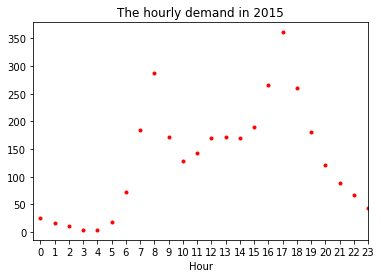

In [131]:
x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(-0.5,23)
demand2.plot(style='r.')
ax.set_title("The hourly demand in 2015")
#plt.savefig("The hourly demand in 2015.jpg")
plt.show()

In [132]:
print("The highest number demand in a day is at 17 o'clock averagely {}. ".format(demand2.max()))
print("The lowest number demand in a day is at 3 o'clock averagely {}. ".format(round(demand2.min(),3)))

The highest number demand in a day is at 17 o'clock averagely 360.925. 
The lowest number demand in a day is at 3 o'clock averagely 4.076. 


In [133]:
# return datetime64 value
def get_clock_time(ts):
    date = ts.date()
    hour = ts.hour
    # clock_time = date 
    clock_time = datetime(date.year,date.month,date.day,hour,0,0)
    return clock_time

Bosten_set["clock_time"] = Bosten_set["start_time"].apply(lambda x: get_clock_time(x))

In [134]:
order_per_bike = Bosten_set.groupby("clock_time")["index"].count()

In [135]:
order_per_bike

clock_time
2015-01-01 00:00:00     4
2015-01-01 01:00:00     3
2015-01-01 02:00:00     1
2015-01-01 04:00:00     1
2015-01-01 08:00:00     4
                       ..
2015-12-31 19:00:00    26
2015-12-31 20:00:00    10
2015-12-31 21:00:00    22
2015-12-31 22:00:00    18
2015-12-31 23:00:00    13
Name: index, Length: 8221, dtype: int64

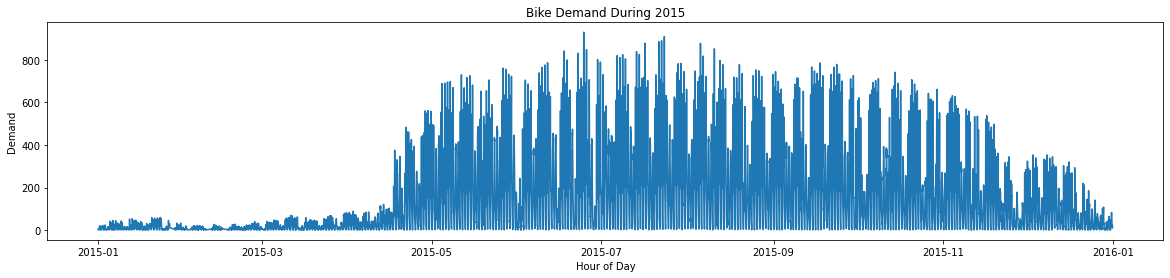

In [136]:
fig,ax = plt.subplots(figsize=(20,4))

ax.plot(order_per_bike)
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Demand")
ax.set_title("Bike Demand During 2015")
#plt.savefig("Bike demand in 2015.jpg")
plt.show()

Below is the detailed demand information for each station to help the station manager to optimize the bike management.

In [137]:
mydateparser = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
testboston=pd.read_csv("boston_2015.csv", parse_dates=['start_time', "end_time"], date_parser=mydateparser)
testboston = testboston.drop(testboston.index[21566])
testboston['end_station_id'] = testboston['end_station_id'].astype(int)

In [138]:
testboston["Hour"]=testboston["start_time"].dt.hour
testboston

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,Hour
0,2015-01-01 00:21:44,2015-01-01 00:30:47,115,96,Porter Square Station,Cambridge Main Library at Broadway / Trowbridg...,277,Subscriber,0
1,2015-01-01 00:27:03,2015-01-01 00:34:21,80,95,MIT Stata Center at Vassar St / Main St,Cambridge St - at Columbia St / Webster Ave,648,Subscriber,0
2,2015-01-01 00:31:31,2015-01-01 00:35:46,91,68,One Kendall Square at Hampshire St / Portland St,Central Square at Mass Ave / Essex St,555,Subscriber,0
3,2015-01-01 00:53:46,2015-01-01 01:00:58,115,96,Porter Square Station,Cambridge Main Library at Broadway / Trowbridg...,1307,Subscriber,0
4,2015-01-01 01:07:06,2015-01-01 01:19:21,105,88,Lower Cambridgeport at Magazine St/Riverside Rd,Inman Square at Vellucci Plaza / Hampshire St,177,Customer,1
...,...,...,...,...,...,...,...,...,...
1122553,2015-12-31 23:35:04,2015-12-31 23:43:15,73,88,Harvard Square at Brattle St / Eliot St,Inman Square at Vellucci Plaza / Hampshire St,1473,Subscriber,23
1122554,2015-12-31 23:37:29,2015-12-31 23:47:36,135,43,ID Building East,Rowes Wharf - Atlantic Ave,649,Subscriber,23
1122555,2015-12-31 23:38:16,2015-12-31 23:47:26,135,43,ID Building East,Rowes Wharf - Atlantic Ave,1552,Subscriber,23
1122556,2015-12-31 23:46:04,2015-12-31 23:48:04,36,36,Boston Public Library - 700 Boylston St.,Boston Public Library - 700 Boylston St.,1083,Customer,23


In [139]:
df=pd.DataFrame(testboston["start_station_name"].unique(), columns=["Name"])
df

,Name
0,Porter Square Station
1,MIT Stata Center at Vassar St / Main St
2,One Kendall Square at Hampshire St / Portland St
3,Lower Cambridgeport at Magazine St/Riverside Rd
4,Inman Square at Vellucci Plaza / Hampshire St
...,...
151,MIT Pacific St at Purrington St
152,University Park
153,MIT Vassar St
154,Lesley University


In [140]:
for x in testboston["start_station_name"].unique():
    for i in range(24):
        p=len(testboston[(testboston["start_station_name"]==x) & (testboston["Hour"]==i)])/365   
        df.at[df["Name"]==x,i]=p
df

,Name,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,Porter Square Station,0.282192,0.158904,0.060274,0.032877,0.013699,0.082192,1.323288,4.358904,3.008219,...,1.232877,1.054795,1.789041,2.035616,2.501370,1.827397,1.328767,1.021918,0.794521,0.517808
1,MIT Stata Center at Vassar St / Main St,0.235616,0.139726,0.109589,0.060274,0.052055,0.030137,0.068493,0.301370,0.452055,...,3.010959,3.619178,6.980822,9.569863,5.572603,3.378082,1.641096,1.136986,0.852055,0.567123
2,One Kendall Square at Hampshire St / Portland St,0.575342,0.284932,0.145205,0.032877,0.013699,0.126027,0.189041,1.104110,2.476712,...,1.613699,2.810959,5.224658,4.556164,2.956164,2.254795,1.465753,1.219178,0.871233,0.920548
3,Lower Cambridgeport at Magazine St/Riverside Rd,0.147945,0.038356,0.024658,0.010959,0.002740,0.164384,0.723288,2.172603,2.964384,...,1.879452,1.772603,2.090411,2.627397,2.591781,1.676712,1.227397,0.734247,0.246575,0.169863
4,Inman Square at Vellucci Plaza / Hampshire St,0.424658,0.216438,0.090411,0.024658,0.024658,0.153425,0.630137,3.290411,5.931507,...,1.663014,1.424658,1.736986,2.246575,1.936986,1.764384,1.150685,0.953425,0.772603,0.545205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,MIT Pacific St at Purrington St,0.063014,0.021918,0.027397,0.005479,0.013699,0.002740,0.043836,0.079452,0.263014,...,0.167123,0.153425,0.142466,0.243836,0.200000,0.180822,0.131507,0.158904,0.136986,0.126027
152,University Park,0.013699,0.019178,0.002740,0.000000,0.000000,0.016438,0.019178,0.016438,0.167123,...,0.147945,0.145205,0.205479,0.268493,0.200000,0.120548,0.164384,0.095890,0.068493,0.054795
153,MIT Vassar St,0.019178,0.002740,0.008219,0.005479,0.002740,0.008219,0.013699,0.087671,0.232877,...,0.131507,0.150685,0.158904,0.189041,0.161644,0.134247,0.076712,0.016438,0.041096,0.049315
154,Lesley University,0.010959,0.002740,0.008219,0.000000,0.000000,0.005479,0.024658,0.043836,0.049315,...,0.095890,0.041096,0.010959,0.046575,0.043836,0.038356,0.041096,0.019178,0.021918,0.008219


## 4. Vehicle Utility (the number of used bikes/total number of bikes)

In [141]:
#The unique bicycle used in each hour 
Bosten_set_clean_used = Bosten_set_clean.groupby(["Date","Hour"])["bike_id"].nunique()
Bosten_set_clean_used = pd.DataFrame(Bosten_set_clean_used)

In [142]:
Bosten_set_clean_used

bike_id
Date       Hour         
2015-01-01 0           4
           1           3
           2           1
           4           1
           8           3
...                  ...
2015-12-31 19         24
           20         10
           21         22
           22         18
           23         13

[8220 rows x 1 columns]

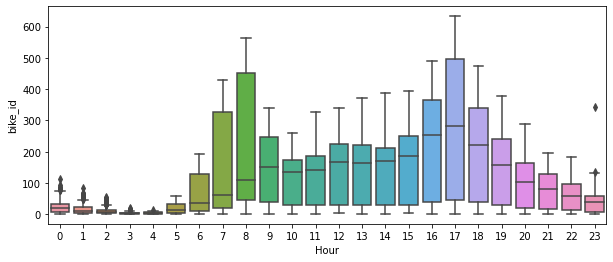

In [143]:
fig,ax = plt.subplots(figsize=(10,4))  

sns.boxplot(x=Bosten_set_clean_used.index.get_level_values(1), y=Bosten_set_clean_used["bike_id"],ax=ax)
plt.show()


People mostly used bikes in rush hours like 7-9 am and 16-18 pm.

In [144]:
bike_size = len(Bosten_set["bike_id"].unique())

print("It consists of {} bikes (for the observed time frame)".format(bike_size))

It consists of 1488 bikes (for the observed time frame)


In [145]:
vehicle_use = Bosten_set.groupby("clock_time")["bike_id"].count()

vehicle_utility = vehicle_use/bike_size
vehicle_utility

clock_time
2015-01-01 00:00:00    0.002688
2015-01-01 01:00:00    0.002016
2015-01-01 02:00:00    0.000672
2015-01-01 04:00:00    0.000672
2015-01-01 08:00:00    0.002688
                         ...   
2015-12-31 19:00:00    0.017473
2015-12-31 20:00:00    0.006720
2015-12-31 21:00:00    0.014785
2015-12-31 22:00:00    0.012097
2015-12-31 23:00:00    0.008737
Name: bike_id, Length: 8221, dtype: float64

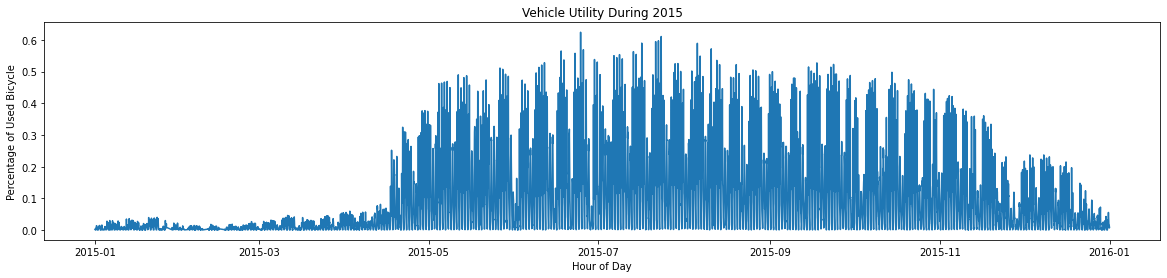

In [146]:
fig,ax = plt.subplots(figsize=(20,4))

ax.plot(vehicle_utility)
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Percentage of Used Bicycle")
ax.set_title("Vehicle Utility During 2015")

plt.show()

In [147]:
vehicle_use2 = Bosten_set.groupby("Hour")["bike_id"].count()

vehicle_utility2 = vehicle_use2/bike_size
vehicle_utility2

Hour
0      6.036290
1      3.719086
2      2.333333
3      0.759409
4      0.770161
5      4.004032
6     16.305108
7     43.384409
8     68.102151
9     40.973790
10    30.736559
11    34.372984
12    40.901882
13    41.342742
14    40.823925
15    45.446909
16    63.985887
17    87.360215
18    63.069220
19    43.634409
20    29.245296
21    21.060484
22    15.854839
23    10.184140
Name: bike_id, dtype: float64

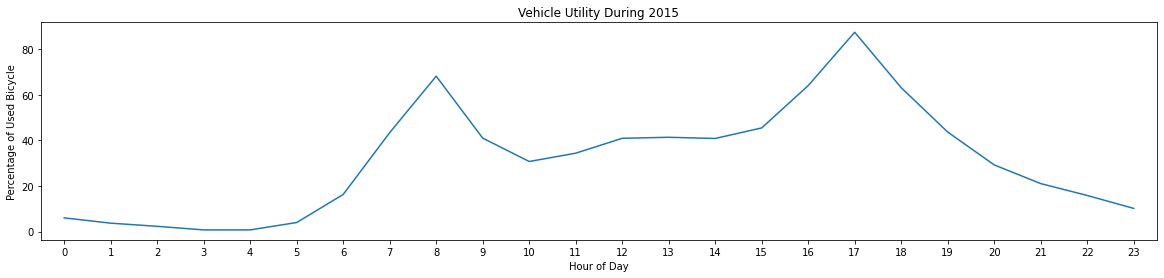

<Figure size 432x288 with 0 Axes>

In [148]:
tick_spacing = 1
fig,ax = plt.subplots(figsize=(20,4))
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.plot(vehicle_utility2)
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Percentage of Used Bicycle")
ax.set_title("Vehicle Utility During 2015")
plt.xlim(-0.5,23.5)
plt.show()
plt.savefig("Vehicle Utility During 2015.jpg")